In [ ]:
from google.colab import files
upload=files.upload()

Saving walmart_features.csv to walmart_features.csv


In [ ]:
train=files.upload()

Saving walmart_train.csv to walmart_train.csv


In [ ]:
a=files.upload()

Saving stores.csv to stores.csv


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
store=pd.read_csv('stores.csv')

In [ ]:
feat=pd.read_csv('walmart_features.csv')
train=pd.read_csv('walmart_train.csv')

In [ ]:
store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
np.unique(store['Store'])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [ ]:
feat.head(10)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
5,1,2010-03-12,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False
6,1,2010-03-19,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False
7,1,2010-03-26,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False
8,1,2010-04-02,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False
9,1,2010-04-09,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False


In [ ]:
feat.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [ ]:
feat['MarkDown1'] = feat['MarkDown1'].fillna(0)
feat['MarkDown2'] = feat['MarkDown2'].fillna(0)
feat['MarkDown3'] = feat['MarkDown3'].fillna(0)
feat['MarkDown4'] = feat['MarkDown4'].fillna(0)
feat['MarkDown5'] = feat['MarkDown5'].fillna(0)

In [ ]:
from statistics import mean
feat['CPI'] = feat['CPI'].fillna(mean(feat['CPI']))
feat['Unemployment'] = feat['Unemployment'].fillna(mean(feat['Unemployment']))

In [ ]:
feat['Store'].value_counts()[1]

182

In [ ]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [ ]:
feat.shape,train.shape,store.shape

((8190, 12), (421570, 5), (45, 3))

In [ ]:
data = pd.merge(feat, train, on=['Store','Date','IsHoliday'], how='inner')
# merging(adding) all stores info with new training data
final_data = pd.merge(data,store,how='inner',on=['Store'])

In [ ]:
final_data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1,24924.50,A,151315
1,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,50605.27,A,151315
2,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,3,13740.12,A,151315
3,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,4,39954.04,A,151315
4,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,5,32229.38,A,151315


In [ ]:
final_data.shape

(421570, 16)

In [ ]:
final_data.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
Dept            0
Weekly_Sales    0
Type            0
Size            0
dtype: int64

In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Date          421570 non-null  object 
 2   Temperature   421570 non-null  float64
 3   Fuel_Price    421570 non-null  float64
 4   MarkDown1     421570 non-null  float64
 5   MarkDown2     421570 non-null  float64
 6   MarkDown3     421570 non-null  float64
 7   MarkDown4     421570 non-null  float64
 8   MarkDown5     421570 non-null  float64
 9   CPI           421570 non-null  float64
 10  Unemployment  421570 non-null  float64
 11  IsHoliday     421570 non-null  bool   
 12  Dept          421570 non-null  int64  
 13  Weekly_Sales  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [ ]:
final_data.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Dept,Weekly_Sales,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,44.260317,15981.258123,136727.915739
std,12.785297,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,30.492054,22711.183519,60980.583328
min,1.000000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,1.000000,-4988.940000,34875.000000
25%,11.000000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,18.000000,2079.650000,93638.000000
50%,22.000000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,37.000000,7612.030000,140167.000000
75%,33.000000,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,74.000000,20205.852500,202505.000000
max,45.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,99.000000,693099.360000,219622.000000


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
x=[]
x.extend((final_data['Type'].value_counts()['A'],final_data['Type'].value_counts()['B'],final_data['Type'].value_counts()['C']))

In [ ]:
print(x)

[215478, 163495, 42597]


In [ ]:
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)

In [ ]:
l=['A','B',"C"]

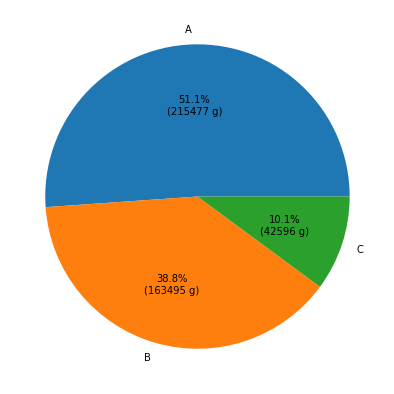

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(x,autopct = lambda pct: func(pct, x),labels=l)

In [ ]:
np.unique(final_data.query("Type=='A'")["Size"])

array([ 39690,  39910, 151315, 152513, 155078, 155083, 158114, 184109,
       196321, 200898, 202307, 202505, 203007, 203742, 203750, 203819,
       204184, 205863, 206302, 207499, 219622])

In [ ]:
np.unique(final_data.query("Type=='B'")["Size"])

array([ 34875,  37392,  57197,  70713,  93188,  93638, 103681, 112238,
       114533, 118221, 119557, 120653, 123737, 125833, 126512, 128107,
       140167])

In [ ]:
np.unique(final_data.query("Type=='C'")["Size"])

array([39690, 39910, 41062, 42988])

In [ ]:
import seaborn as sns

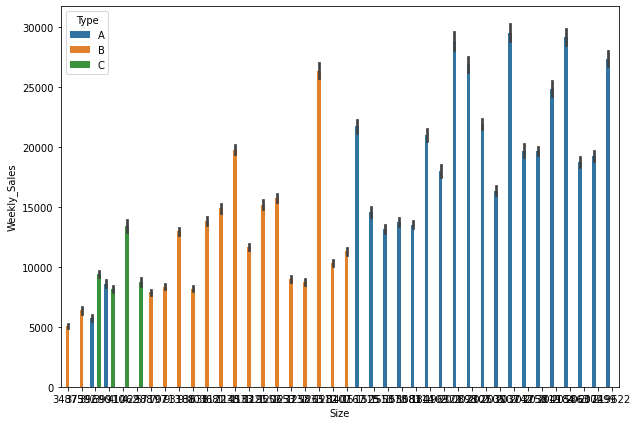

In [ ]:
fig = plt.figure(figsize =(10, 7))
sns.barplot(data=final_data,x="Size",y="Weekly_Sales",hue="Type")
plt.show()

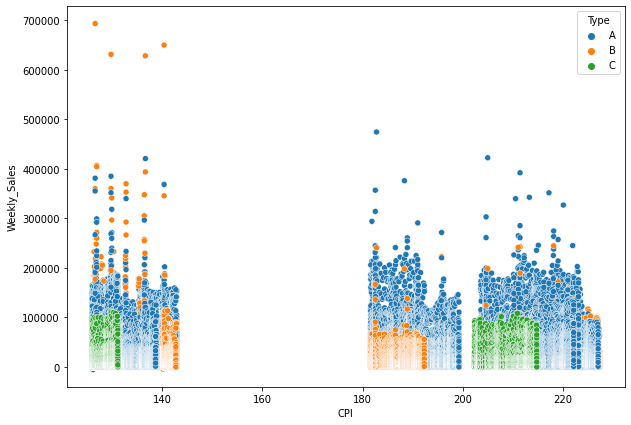

In [ ]:
#cpi vs weekly sales
fig = plt.figure(figsize =(10, 7))
sns.scatterplot(data=final_data,x="CPI",y="Weekly_Sales",hue="Type")
plt.show()

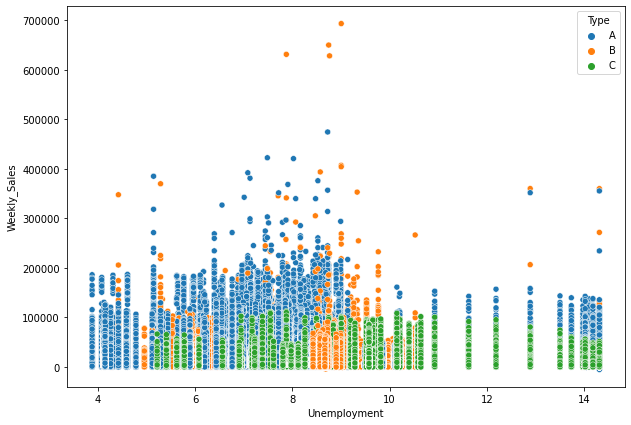

In [ ]:
#unemp vs weekly sales
fig = plt.figure(figsize =(10, 7))
sns.scatterplot(data=final_data,x="Unemployment",y="Weekly_Sales",hue="Type")
plt.show()

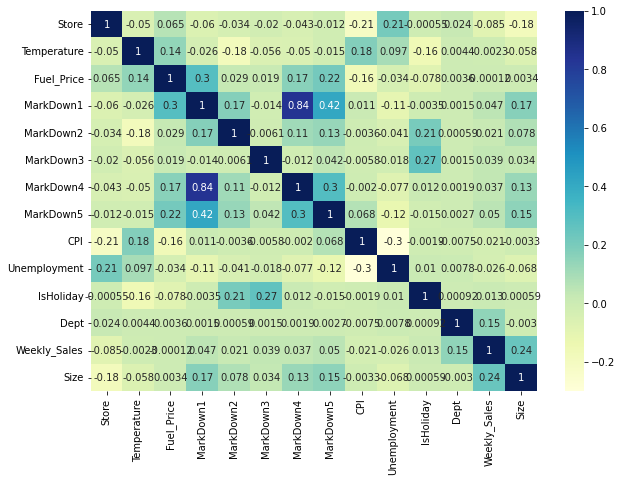

In [ ]:
fig = plt.figure(figsize =(10, 7))
dataplot = sns.heatmap(final_data.corr(), cmap="YlGnBu", annot=True)

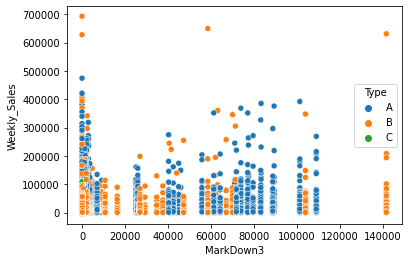

In [ ]:
sns.scatterplot(data=final_data,x="MarkDown3",y="Weekly_Sales",hue="Type")

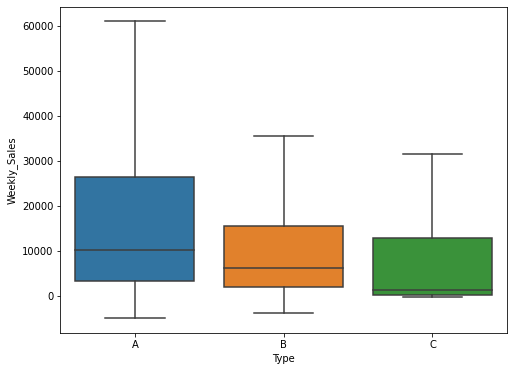

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Type', y='Weekly_Sales', data=final_data, showfliers=False)

data pre processing

In [ ]:
types=pd.get_dummies(final_data['Type'])
hol=pd.get_dummies(final_data['IsHoliday'])

In [ ]:
data= pd.concat([final_data, types],axis=1)
data= pd.concat([data, hol],axis=1)

In [ ]:
data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,...,IsHoliday,Dept,Weekly_Sales,Type,Size,A,B,C,False,True
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,...,False,1,24924.50,A,151315,1,0,0,1,0
1,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,...,False,2,50605.27,A,151315,1,0,0,1,0
2,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,...,False,3,13740.12,A,151315,1,0,0,1,0
3,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,...,False,4,39954.04,A,151315,1,0,0,1,0
4,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,...,False,5,32229.38,A,151315,1,0,0,1,0


In [ ]:
data.columns

Index([       'Store',         'Date',  'Temperature',   'Fuel_Price',
          'MarkDown1',    'MarkDown2',    'MarkDown3',    'MarkDown4',
          'MarkDown5',          'CPI', 'Unemployment',    'IsHoliday',
               'Dept', 'Weekly_Sales',         'Type',         'Size',
                  'A',            'B',            'C',          False,
                 True],
      dtype='object')

In [ ]:
data=data.drop(['Type','IsHoliday'],axis=1)

In [ ]:
data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Dept,Weekly_Sales,Size,A,B,C,False,True
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,24924.50,151315,1,0,0,1,0
1,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2,50605.27,151315,1,0,0,1,0
2,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,13740.12,151315,1,0,0,1,0
3,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,4,39954.04,151315,1,0,0,1,0
4,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,5,32229.38,151315,1,0,0,1,0


In [ ]:
data.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Dept            0
Weekly_Sales    0
Size            0
A               0
B               0
C               0
False           0
True            0
dtype: int64

In [ ]:
target= data['Weekly_Sales']

In [ ]:
final=data.drop(['Date','Weekly_Sales'],axis=1)

In [ ]:
final=final.drop(['MarkDown1','MarkDown2','MarkDown4','MarkDown5'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(final,target,test_size=0.2,random_state=1)

In [ ]:
x_train.shape,y_train.shape

((337256, 13), (337256,))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
x=scaler.fit_transform(x_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['bool', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['bool', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [ ]:
test=scaler.transform(x_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['bool', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [ ]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 

In [ ]:
from math import sqrt

In [ ]:
knn = neighbors.KNeighborsRegressor(n_neighbors=10,n_jobs=4)
knn.fit(x,y_train)
y_pred = knn.predict(test)

In [ ]:
knn.score(test,y_test)

0.7963098400637465

In [ ]:
error = sqrt(mean_squared_error(y_test,y_pred)) #calculate rmse

In [ ]:
error

10180.21018350415

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfr = RandomForestRegressor(n_estimators = 200)        

In [ ]:
rfr.fit(x,y_train)

In [ ]:
pred=rfr.predict(test)

In [ ]:
rfr.score(x,y_train)

0.9916695211679324

In [ ]:
rfr.score(test,y_test)

0.932487702790815

In [ ]:
err = sqrt(mean_squared_error(y_test,pred)) 